# Problem 1

In [45]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [46]:
train_data = pd.read_csv('train.csv')
grlivarea=pd.DataFrame(train_data['GrLivArea'])
totalbsmtsf=pd.DataFrame(train_data['TotalBsmtSF'])
garagearea=pd.DataFrame(train_data['GarageArea'])
lotarea=pd.DataFrame(train_data['LotArea'])

<AxesSubplot:>

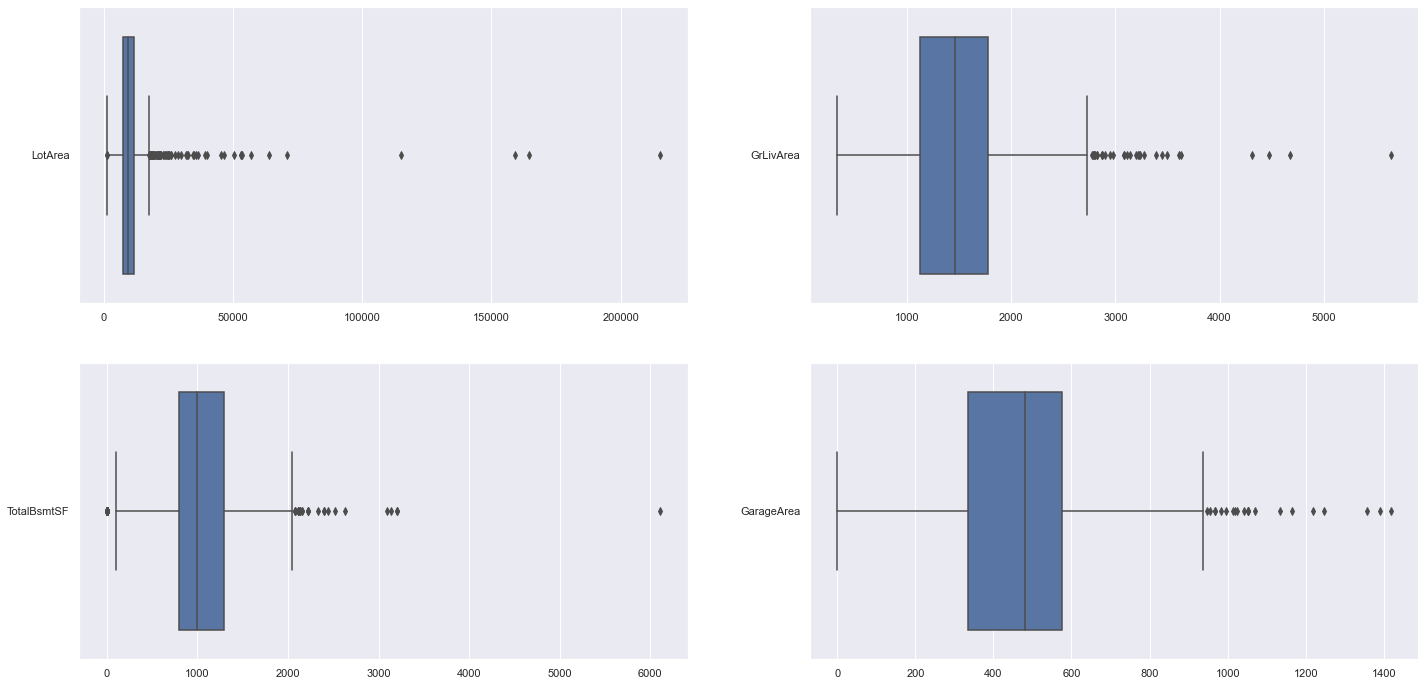

In [47]:
f, axes = plt.subplots(2, 2, figsize=(24, 12))
sb.boxplot(data = lotarea, orient = "h", ax = axes[0,0])
sb.boxplot(data = grlivarea, orient = "h", ax = axes[0,1])
sb.boxplot(data = totalbsmtsf, orient = "h", ax = axes[1,0])
sb.boxplot(data = garagearea, orient = "h", ax = axes[1,1])

In [48]:
jointDF = pd.concat([lotarea,grlivarea,totalbsmtsf,garagearea], axis = 1)
jointDF.describe()

,LotArea,GrLivArea,TotalBsmtSF,GarageArea
count,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,1515.463699,1057.429452,472.980137
std,9981.264932,525.480383,438.705324,213.804841
min,1300.000000,334.000000,0.000000,0.000000
25%,7553.500000,1129.500000,795.750000,334.500000
50%,9478.500000,1464.000000,991.500000,480.000000
75%,11601.500000,1776.750000,1298.250000,576.000000
max,215245.000000,5642.000000,6110.000000,1418.000000


In [49]:
#Identifying number of outliers for each category
Q1 = jointDF.quantile(0.25)
Q3 = jointDF.quantile(0.75)
IQR = Q3 - Q1
print('The number of outliers for each categories')
((jointDF < (Q1 - 1.5 * IQR)) | (jointDF > (Q3 + 1.5 * IQR))).sum()

The number of outliers for each categories


LotArea        69
GrLivArea      31
TotalBsmtSF    61
GarageArea     21
dtype: int64

# (a)
LotArea has the most outliers and it has 69 outliers.

# (b)

<AxesSubplot:ylabel='Density'>

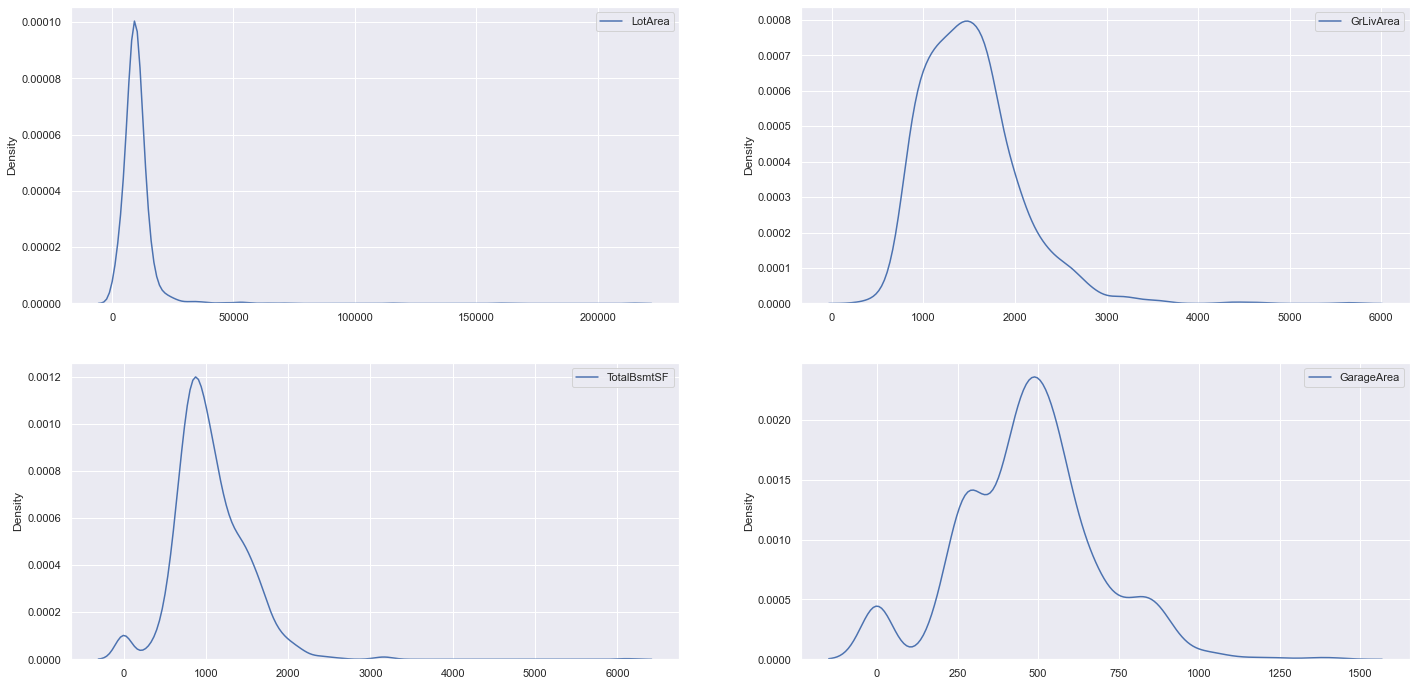

In [50]:
f, axes = plt.subplots(2, 2, figsize=(24, 12))
sb.kdeplot(data = lotarea, ax = axes[0,0])
sb.kdeplot(data = grlivarea, ax = axes[0,1])
sb.kdeplot(data = totalbsmtsf, ax = axes[1,0])
sb.kdeplot(data = garagearea, ax = axes[1,1])

From the KDE graphs plotted for each variables, GarageArea is the most skewed from a regular normal distribution. It is skewed negative as it has a longer and fatter tail on its left.

# (c)

In [51]:
print("The correlation data table with respect to SalePrice")
saleprice=pd.DataFrame(train_data['SalePrice'])
jointDDF=pd.concat([jointDF, saleprice], axis=1)
jointDDF.corr().drop(['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea'])

The correlation data table with respect to SalePrice


,LotArea,GrLivArea,TotalBsmtSF,GarageArea,SalePrice
SalePrice,0.263843,0.708624,0.613581,0.623431,1.0


Since GrLivArea and GarageArea has the correlation with respect to SalePrice closest to 1.0, suggesting have strong correlaton with SalePrice. Thus, Grlivarea and GarageArea will help us the most in predicting ‘SalePrice’ of houses in this data.

# Problem 2

In [52]:
mssubclass=pd.DataFrame(train_data['MSSubClass'])
neighborhood=pd.DataFrame(train_data['Neighborhood'])
bldgtype=pd.DataFrame(train_data[ 'BldgType'])
overallqual=pd.DataFrame(train_data['OverallQual'])
jointDDDF = pd.concat([mssubclass,neighborhood,bldgtype,overallqual], axis = 1)
jointDDDF.head()

,MSSubClass,Neighborhood,BldgType,OverallQual
0,60,CollgCr,1Fam,7
1,20,Veenker,1Fam,6
2,60,CollgCr,1Fam,7
3,70,Crawfor,1Fam,7
4,60,NoRidge,1Fam,8


In [53]:
print("MSSubClass has", len(jointDDDF["MSSubClass"].unique()),"unique levels")
print("Neighborhood has", len(jointDDDF["Neighborhood"].unique()),"unique levels")
print("BldgType has", len(jointDDDF["BldgType"].unique()),"unique levels")
print("OverallQual has", len(jointDDDF["OverallQual"].unique()),"unique levels")
neighborhood.value_counts()

MSSubClass has 15 unique levels
Neighborhood has 25 unique levels
BldgType has 5 unique levels
OverallQual has 10 unique levels


Neighborhood
NAmes           225
CollgCr         150
OldTown         113
Edwards         100
Somerst          86
Gilbert          79
NridgHt          77
Sawyer           74
NWAmes           73
SawyerW          59
BrkSide          58
Crawfor          51
Mitchel          49
NoRidge          41
Timber           38
IDOTRR           37
ClearCr          28
StoneBr          25
SWISU            25
Blmngtn          17
MeadowV          17
BrDale           16
Veenker          11
NPkVill           9
Blueste           2
dtype: int64

# (a) 
Hence, Neighborhood has the highest number of levels.

Also, the level "NAmes" under neighborhood category has the highest number of houses.

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

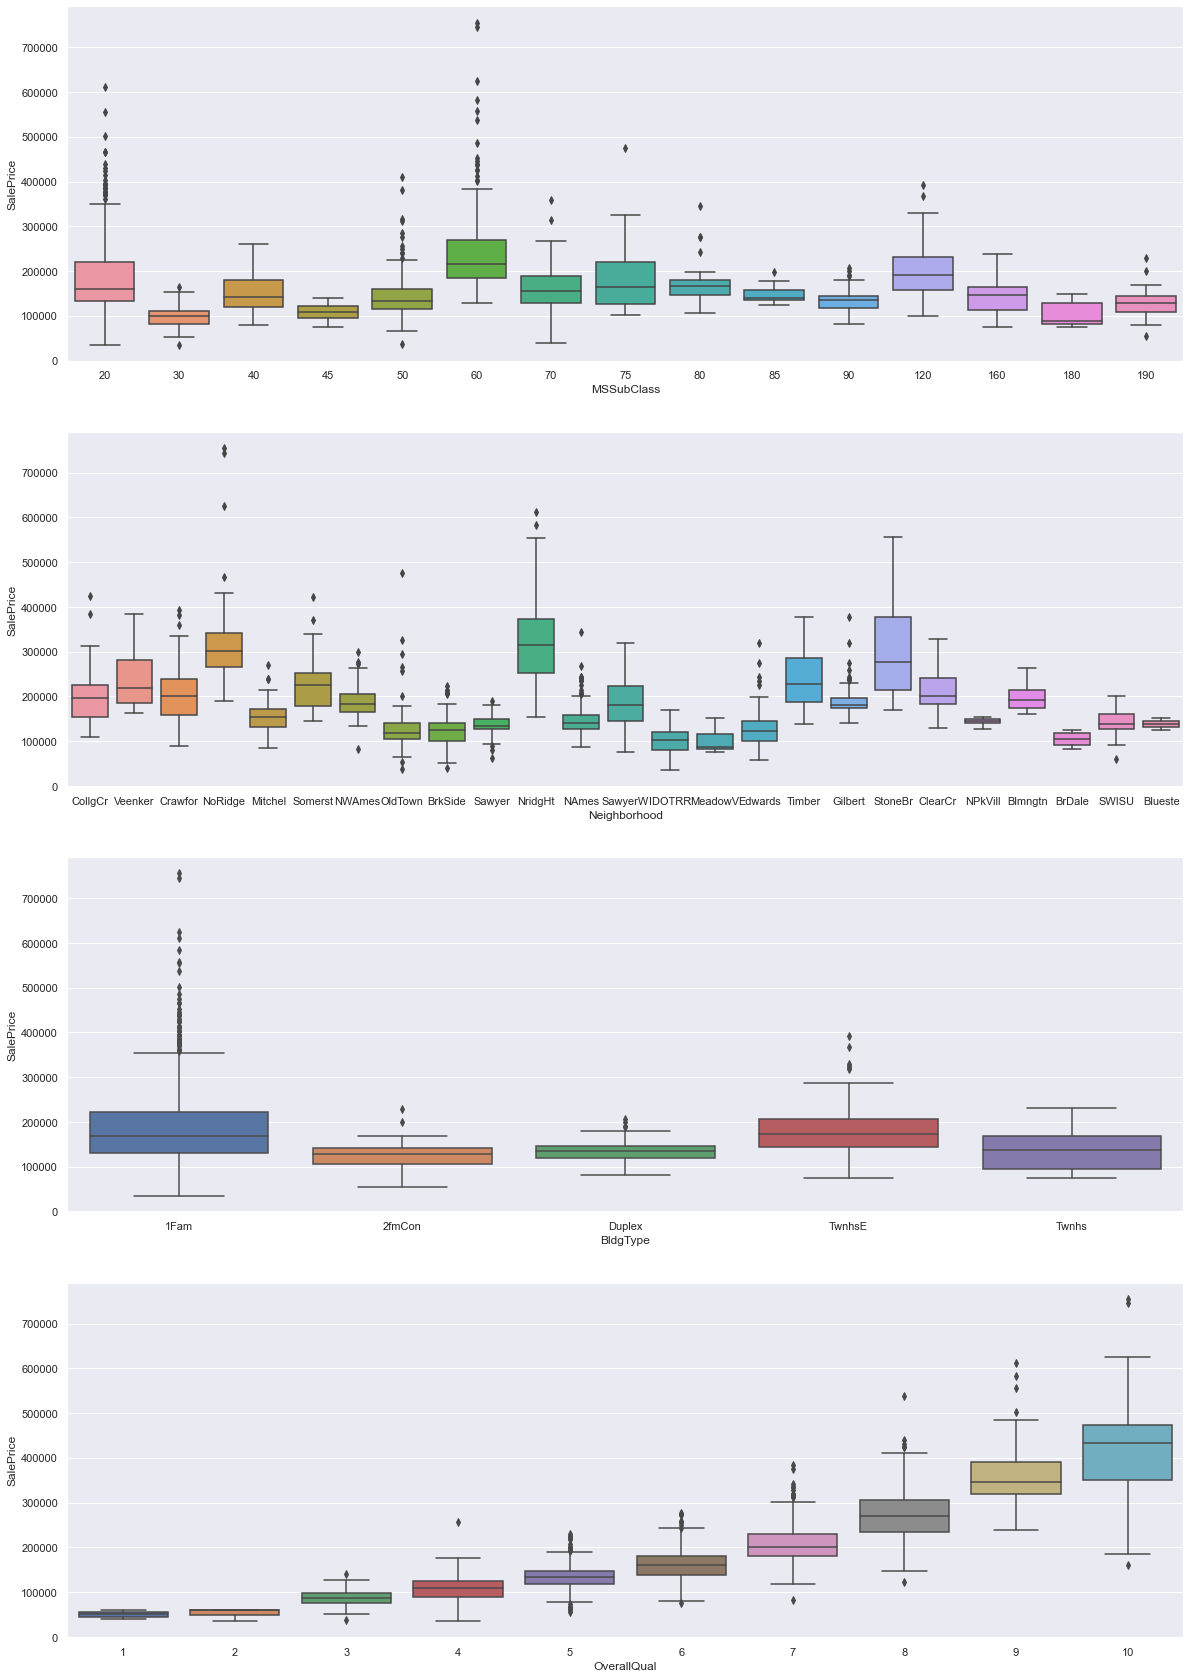

In [54]:
f, axes = plt.subplots(4, 1, figsize=(20, 30))
sb.boxplot(data = train_data,x=train_data['MSSubClass'],y=train_data["SalePrice"], ax=axes[0])
sb.boxplot(data = train_data,x=train_data['Neighborhood'],y=train_data["SalePrice"], ax=axes[1])
sb.boxplot(data = train_data,x=train_data['BldgType'],y=train_data["SalePrice"], ax=axes[2])
sb.boxplot(data = train_data,x=train_data['OverallQual'],y=train_data["SalePrice"], ax=axes[3])

# (b)
From the boxplots above for each categories, we can tell Neighborhood and OverallQual are the top 2 variables that will help determine SalePrice as the IQRs of different levels of the categorical variables Neighborhood and OverallQual vary more than that of MSSubClss and BldgType.

# Problem 3 (b)

In [55]:
print("Oldest Remodel date in year:", train_data['YearRemodAdd'].min())
print("Newest Remodel date in year:", train_data['YearRemodAdd'].max())

Oldest Remodel date in year: 1950
Newest Remodel date in year: 2010


<AxesSubplot:xlabel='YearRemodAdd', ylabel='SalePrice'>

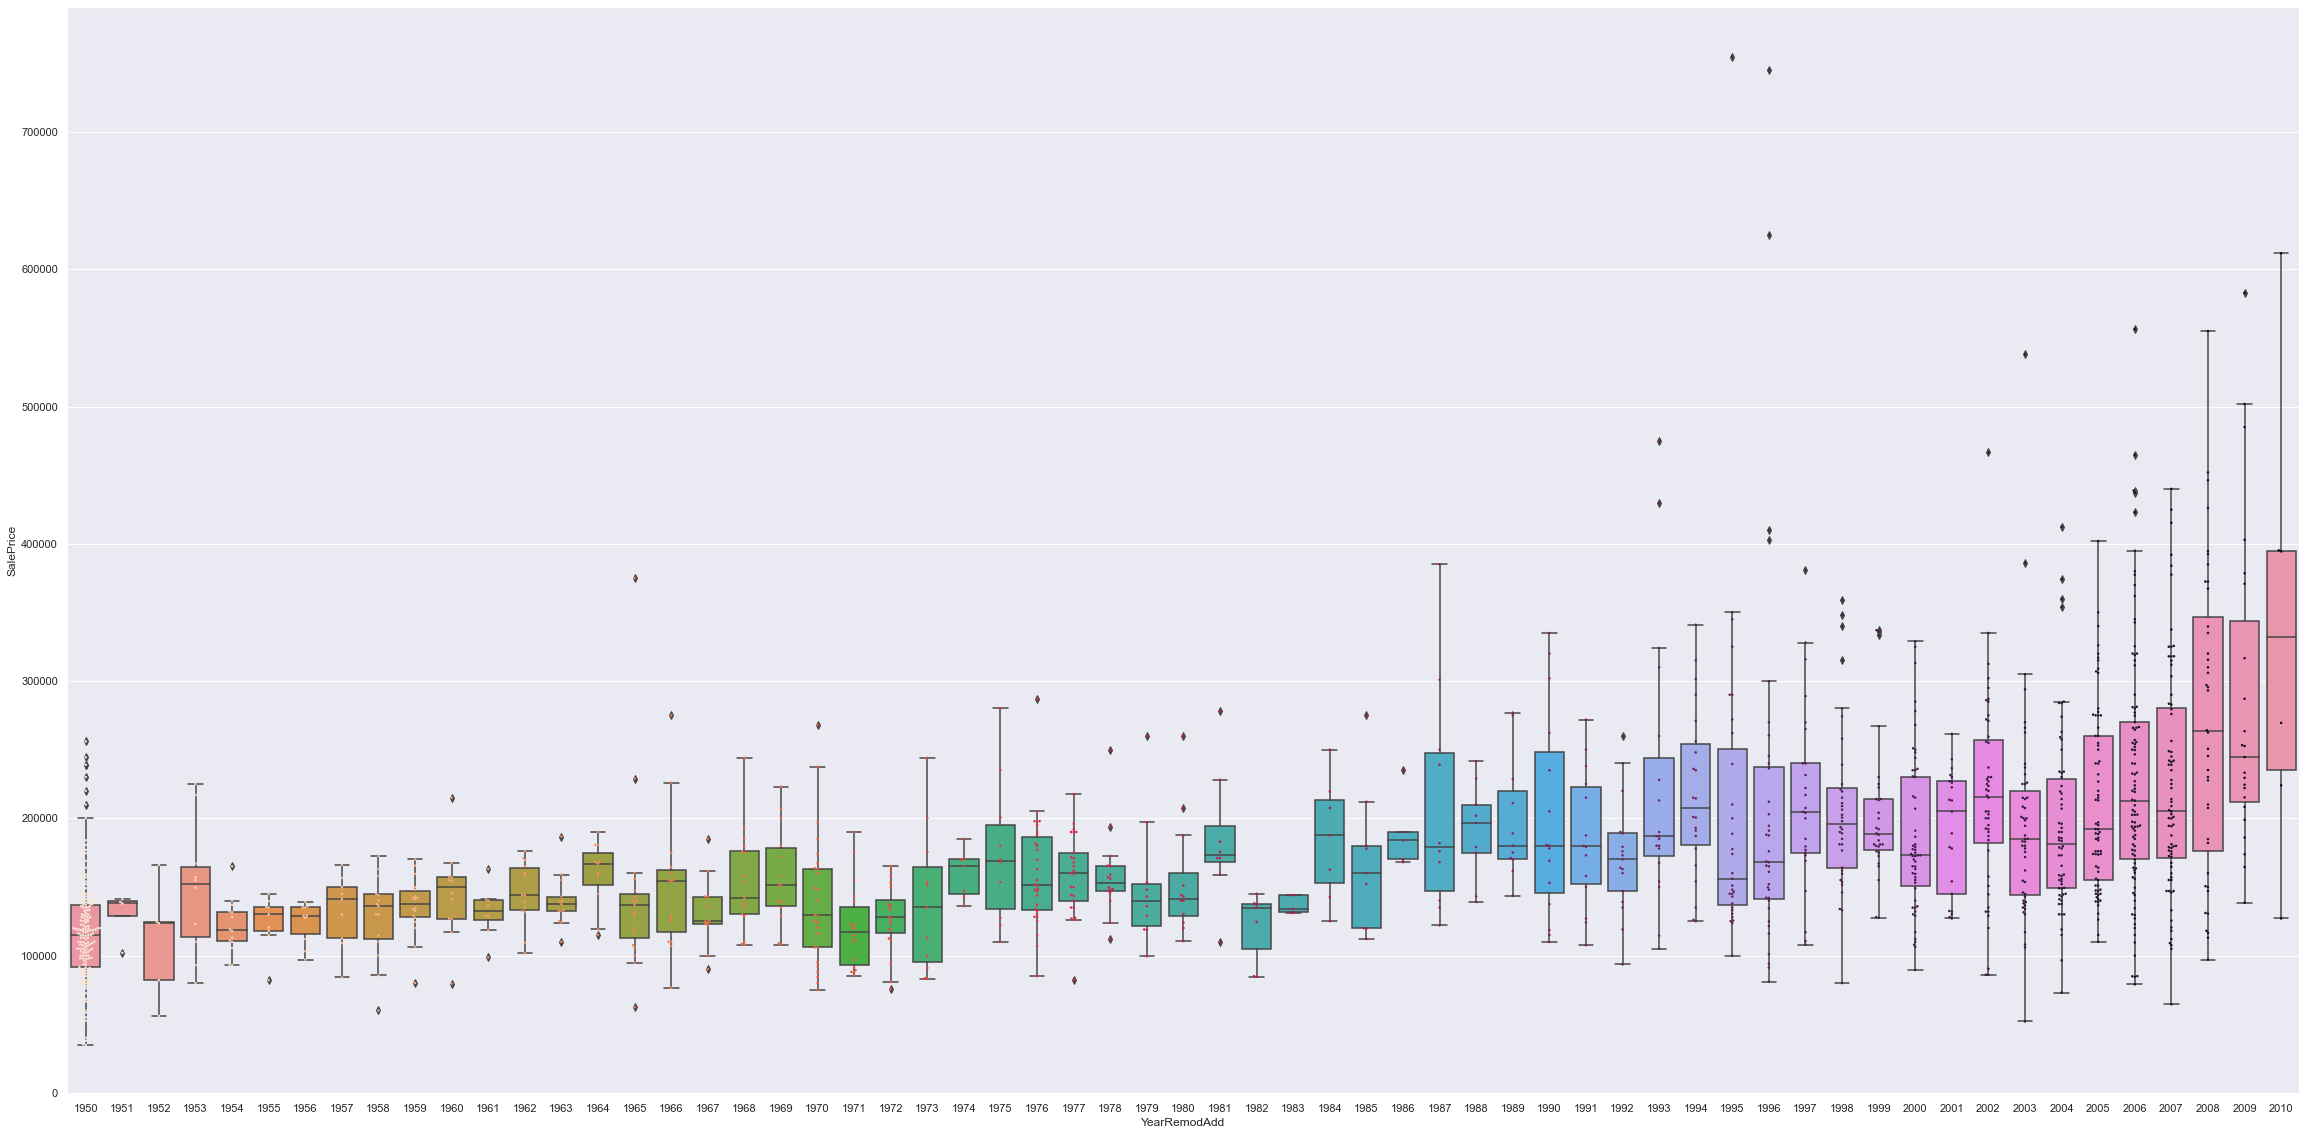

In [56]:
plt.figure(figsize=(40,20))
sb.boxplot(data=train_data, x=train_data["YearRemodAdd"], y=train_data["SalePrice"])
sb.swarmplot(data=train_data, x=train_data["YearRemodAdd"], y=train_data["SalePrice"], palette='rocket_r',size=2.5)

From the graph plotted above, we can observe a general icreasing trend between sale price of houses and YearRemodAdd. Thus, we can conclude that in general, the more recent the house was built or remodeled, the higher the sale price of the houses. Secondly, we can also oberve that as the houses get older since they was last built or remodeled, the IQR of sale price of housing also increases. This also suggested that the sale price of the houses will be affected by how recent the house is remodeled.